In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder



In [92]:
df=pd.read_csv(r"C:\Users\vikas\OneDrive\Desktop\bleder dining table\student_exam_scores.csv")

In [93]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [95]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [96]:
df.shape

(200, 6)

In [97]:
df.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [98]:
df.duplicated().sum()

np.int64(0)

In [99]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [100]:
numeric_columns=['hours_studied','sleep_hours','attendance_percent','previous_scores','exam_score']


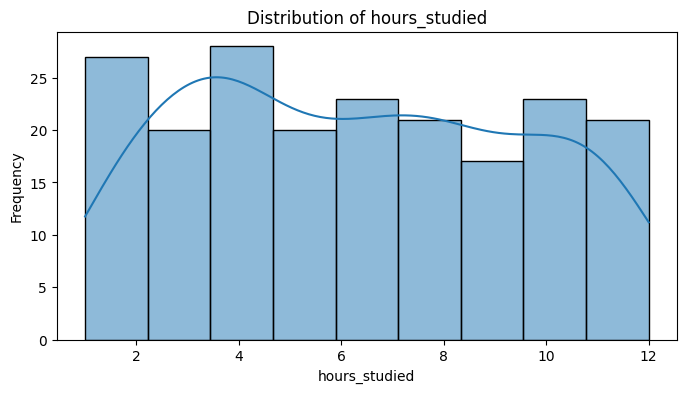

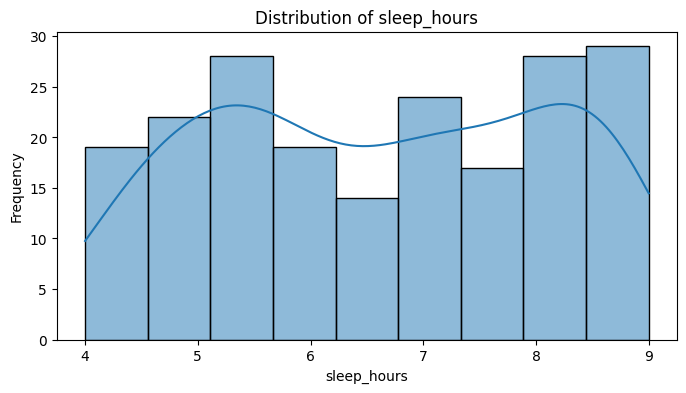

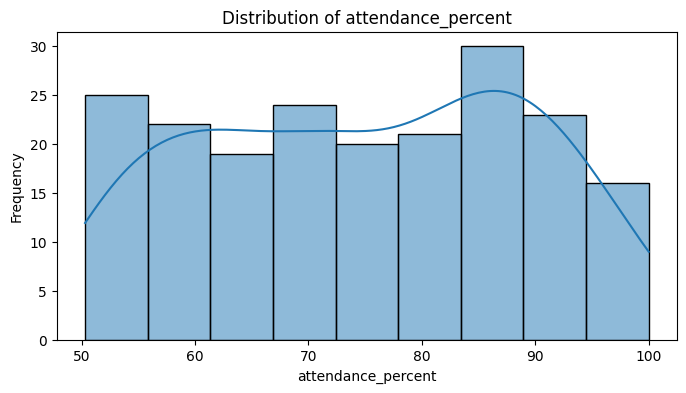

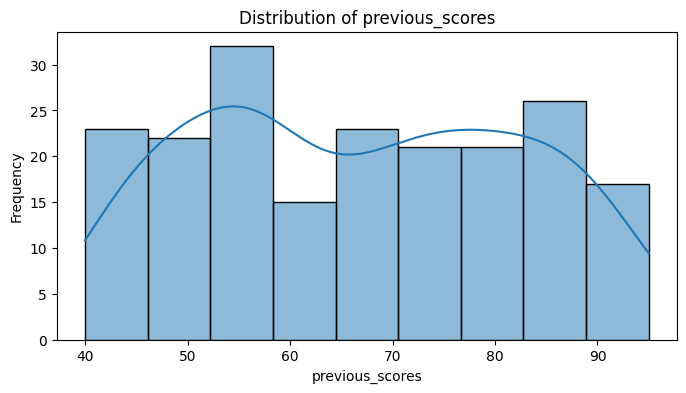

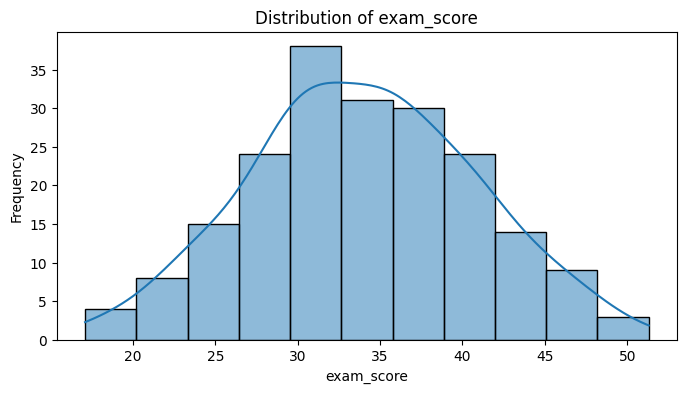

In [101]:
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

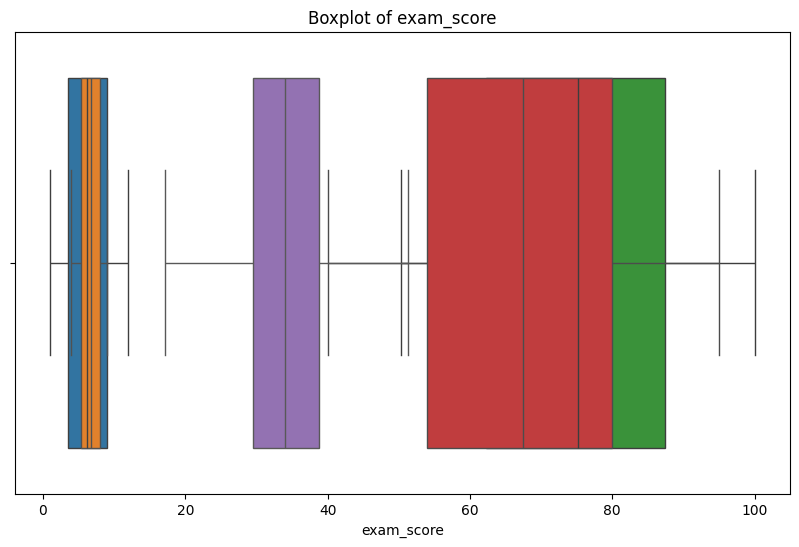

In [102]:
plt.figure(figsize=(10,6))
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

Text(0.5, 1.0, 'Correlation Matrix')

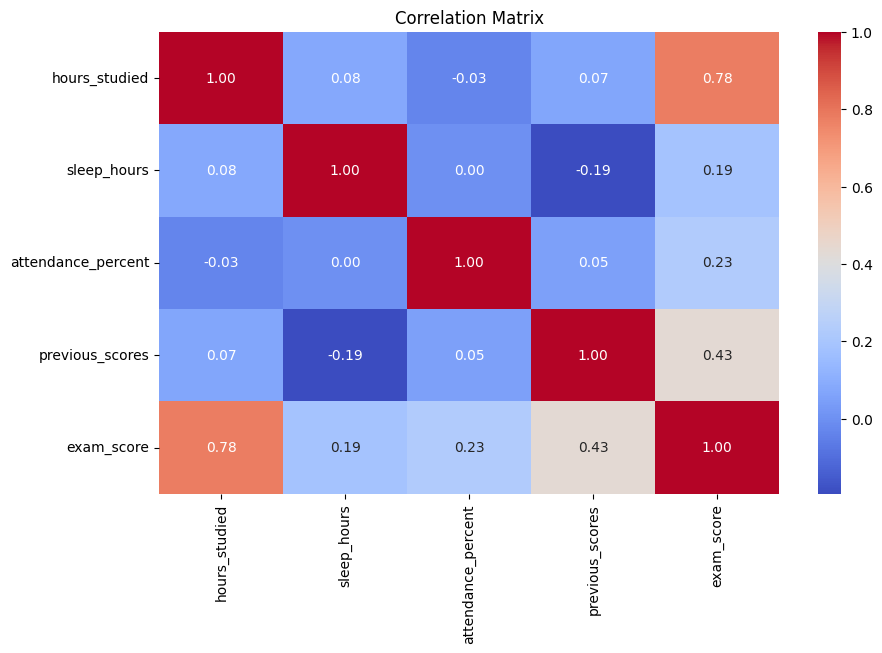

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_columns].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

In [104]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [105]:
df.drop(['student_id'],inplace=True,axis=1)

In [106]:
df.head()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3


In [107]:
x=df.drop('exam_score',axis=1)
y=df['exam_score']

In [111]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)


In [112]:
x_scaled

,hours_studied,sleep_hours,attendance_percent,previous_scores
0,0.520154,1.458426,-0.192061,-1.395230
1,-1.561083,1.324503,-0.994074,-0.755216
2,-0.722376,1.056656,-0.079498,1.228827
3,-0.877692,-1.220042,1.426035,-0.051201
4,0.861850,-0.148655,1.053170,0.268806
...,...,...,...,...
195,1.296735,-0.818272,1.348648,1.292828
196,0.240585,-0.349540,0.722515,1.612835
197,-1.467893,0.186154,-0.775983,0.588813
198,1.762684,0.454000,-1.711664,-0.563212


In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)   

In [117]:
import optuna
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Objective function for Optuna
def objective(trial):
    model_name = trial.suggest_categorical("model", ["Linear", "Ridge", "Lasso", "RandomForest"])
    
    if model_name == "Linear":
        model = LinearRegression()
        
    elif model_name == "Ridge":
        alpha = trial.suggest_float("ridge_alpha", 0.001, 10.0, log=True)
        model = Ridge(alpha=alpha)
        
    elif model_name == "Lasso":
        alpha = trial.suggest_float("lasso_alpha", 0.001, 1.0, log=True)
        model = Lasso(alpha=alpha, max_iter=10000)
        
    else:  # RandomForest
        n_estimators = trial.suggest_int("rf_n_estimators", 50, 500)
        max_depth = trial.suggest_int("rf_max_depth", 2, 10)
        min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 10)
        min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 4)
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
    
    # Pipeline with scaling for linear models
    if model_name in ["Linear", "Ridge", "Lasso"]:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])
    else:
        pipeline = model
    
    # 3-fold cross-validation MSE
    score = cross_val_score(pipeline, x_train, y_train, scoring="neg_mean_squared_error", cv=3)
    mse = -score.mean()
    return mse

# Run Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=300)

# Best model & hyperparameters
print("Best Model Params:", study.best_params)
print("Best CV MSE:", study.best_value)

# Train best model on full training data
best_model_name = study.best_params['model']

if best_model_name == "Linear":
    best_model = Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])
elif best_model_name == "Ridge":
    best_model = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge(alpha=study.best_params['ridge_alpha']))])
elif best_model_name == "Lasso":
    best_model = Pipeline([('scaler', StandardScaler()), ('regressor', Lasso(alpha=study.best_params['lasso_alpha'], max_iter=10000))])
else:
    best_model = RandomForestRegressor(
        n_estimators=study.best_params['rf_n_estimators'],
        max_depth=study.best_params['rf_max_depth'],
        min_samples_split=study.best_params['rf_min_samples_split'],
        min_samples_leaf=study.best_params['rf_min_samples_leaf'],
        random_state=42
    )

# Fit and evaluate
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))


[I 2025-10-06 17:19:44,050] A new study created in memory with name: no-name-6f77899b-0fc8-403d-a79d-84c0064d3771
[I 2025-10-06 17:19:44,845] Trial 0 finished with value: 12.056309954507256 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 92, 'rf_max_depth': 6, 'rf_min_samples_split': 9, 'rf_min_samples_leaf': 4}. Best is trial 0 with value: 12.056309954507256.
[I 2025-10-06 17:19:46,731] Trial 1 finished with value: 13.756917145845426 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 302, 'rf_max_depth': 3, 'rf_min_samples_split': 2, 'rf_min_samples_leaf': 2}. Best is trial 0 with value: 12.056309954507256.
[I 2025-10-06 17:19:46,787] Trial 2 finished with value: 7.605159652514185 and parameters: {'model': 'Linear'}. Best is trial 2 with value: 7.605159652514185.
[I 2025-10-06 17:19:46,832] Trial 3 finished with value: 7.605159652514185 and parameters: {'model': 'Linear'}. Best is trial 2 with value: 7.605159652514185.
[I 2025-10-06 17:19:47,940] Trial 4 finishe

Best Model Params: {'model': 'Ridge', 'ridge_alpha': 0.8496603691249983}
Best CV MSE: 7.602876865823432
Test MSE: 7.760583725213718


In [119]:
best_model=Ridge(alpha=study.best_params['ridge_alpha'])

In [120]:
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

In [121]:
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

Test MSE: 7.765524705866167


In [122]:
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

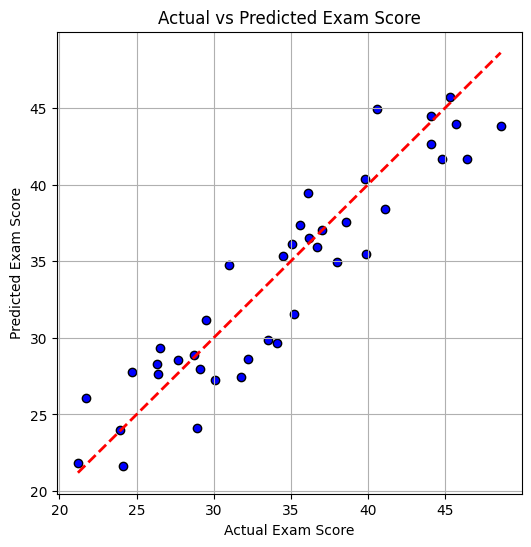

In [124]:
y_pred = best_model.predict(x_test)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Score')
plt.grid(True)
plt.show()